<h2><p align="center"> Importação de bibliotecas e consulta a base de dados do banco central </h2></p>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
import seaborn as sns; sns.set()

#Obtendo dados da Base central do Banco do Brasil
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df
   
#Estes são exemplos de informações que podem ser consultados na base de dados do Banco Central
ipca = consulta_bc(433)
selic_meta = consulta_bc(432)

<h3><p align="center"> Entrada de valores </h3></p>

In [1]:
a = selic_meta['valor'].values.tolist()
print(a)

#for i in range(-365):
 #   print (selic_meta['valor'].iloc[-i])

#for i in range(+365):
#    print (selic_meta['valor'].iloc[-i])

y = selic_meta['valor'].iloc[-1]

NameError: name 'selic_meta' is not defined

In [15]:
Valoraplicado = float(input("Insira o valor do aporte para ser calculado"))
print(f'Este é o valor do aporte inserido: {Valoraplicado:.2f} reais')
x = selic_meta['valor'].iloc[-1]
print(f'Este é o valor da taxa selic hoje: {x:.2f}% ao ano')
selicmes = x/12
print (f'Este seria o valor da taxa selic {selicmes:.2f}% ao mes')
selicdia = x/365
print (f'E este seria o valor da taxa selic {selicdia:.2f}% ao dia')

tempoaplicadoemdias = int(input())
IR1=0.15/100
IR2=0.175/100
IR3=0.2/100
IR4=0.225/100
IOF=1

#Estrutura condicional para estabelecer o cálculo do IR 
#para os dias que o valor ficou rendendo na SELIC


if ((tempoaplicadoemdias)<=180):
    valorfinal = Valoraplicado + (Valoraplicado * tempoaplicadoemdias * IR1 * selicdia)
    
if ((tempoaplicadoemdias)>180 and (tempoaplicadoemdias)<=360):
    valorfinal = Valoraplicado + (Valoraplicado * tempoaplicadoemdias * IR2 * selicdia)
    
if ((tempoaplicadoemdias)>360 and (tempoaplicadoemdias)<=720):
    valorfinal = Valoraplicado + (Valoraplicado * tempoaplicadoemdias * IR3 * selicdia)
    
if ((tempoaplicadoemdias)>(720)):
    valorfinal = Valoraplicado + (Valoraplicado * tempoaplicadoemdias * IR4 * selicdia)

print(valorfinal)

print(Valoraplicado/valorfinal)


Este é o valor do aporte inserido: 500.00 reais
Este é o valor da taxa selic hoje: 13.75% ao ano
Este seria o valor da taxa selic 1.15% ao mes
E este seria o valor da taxa selic 0.04% ao dia
513.75
0.9732360097323601


Text(0, 0.5, '%')

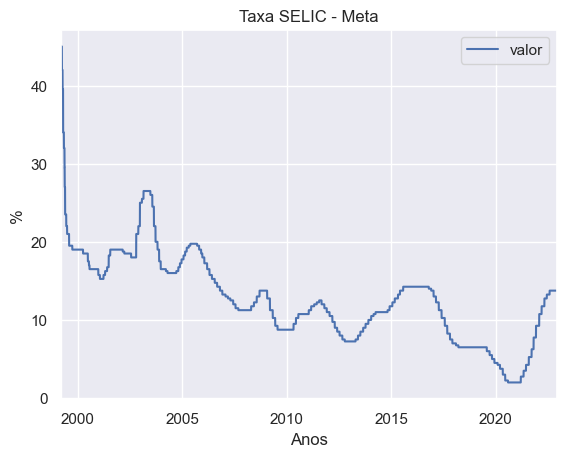

In [4]:
selic_meta.plot()
plt.title("Taxa SELIC - Meta")
plt.xlabel("Anos")
plt.ylabel("%")